### Importing The Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

### Importing the Dataset

In [2]:
# Use the correct delimiter ';' to parse the CSV file
df = pd.read_csv(r'C:\Users\benke\Downloads\predict+students+dropout+and+academic+success\data.csv', delimiter=';')

# Display the first few rows to verify the result
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Investigation

In [3]:
# shape of the date 
df.shape 

(4424, 37)

In [4]:
# chekcing for duplicates
df.duplicated().sum()

0

In [5]:
# Getting more information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# showing columns
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Data Wrangling | Cleaning

In [8]:
# stripping columns of whitespaces

df.columns = df.columns.str.strip()

In [9]:
# renaming columns 

df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance',
                  'Nacionality': 'Nationality'}, inplace=True)

In [10]:
# checking results
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [13]:
# changing datatypes that should be categorical from numerical 

categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nationality', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [15]:
# extracting the numerical columns from the dataset
num_cols = df.select_dtypes(include=['int64', 'float64'])

In [16]:
# extracting categorical columns

cat_cols = df.select_dtypes(include=['object', 'category'])

# checking result
cat_cols.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,17,171,1,1,1,19,12,5,9,1,0,0,1,1,0,0,Dropout
1,1,15,9254,1,1,1,1,3,3,3,1,0,0,0,1,0,0,Graduate
2,1,1,9070,1,1,1,37,37,9,9,1,0,0,0,1,0,0,Dropout
3,1,17,9773,1,1,1,38,37,5,3,1,0,0,1,0,0,0,Graduate
4,2,39,8014,0,1,1,37,38,9,9,0,0,0,1,0,0,0,Graduate


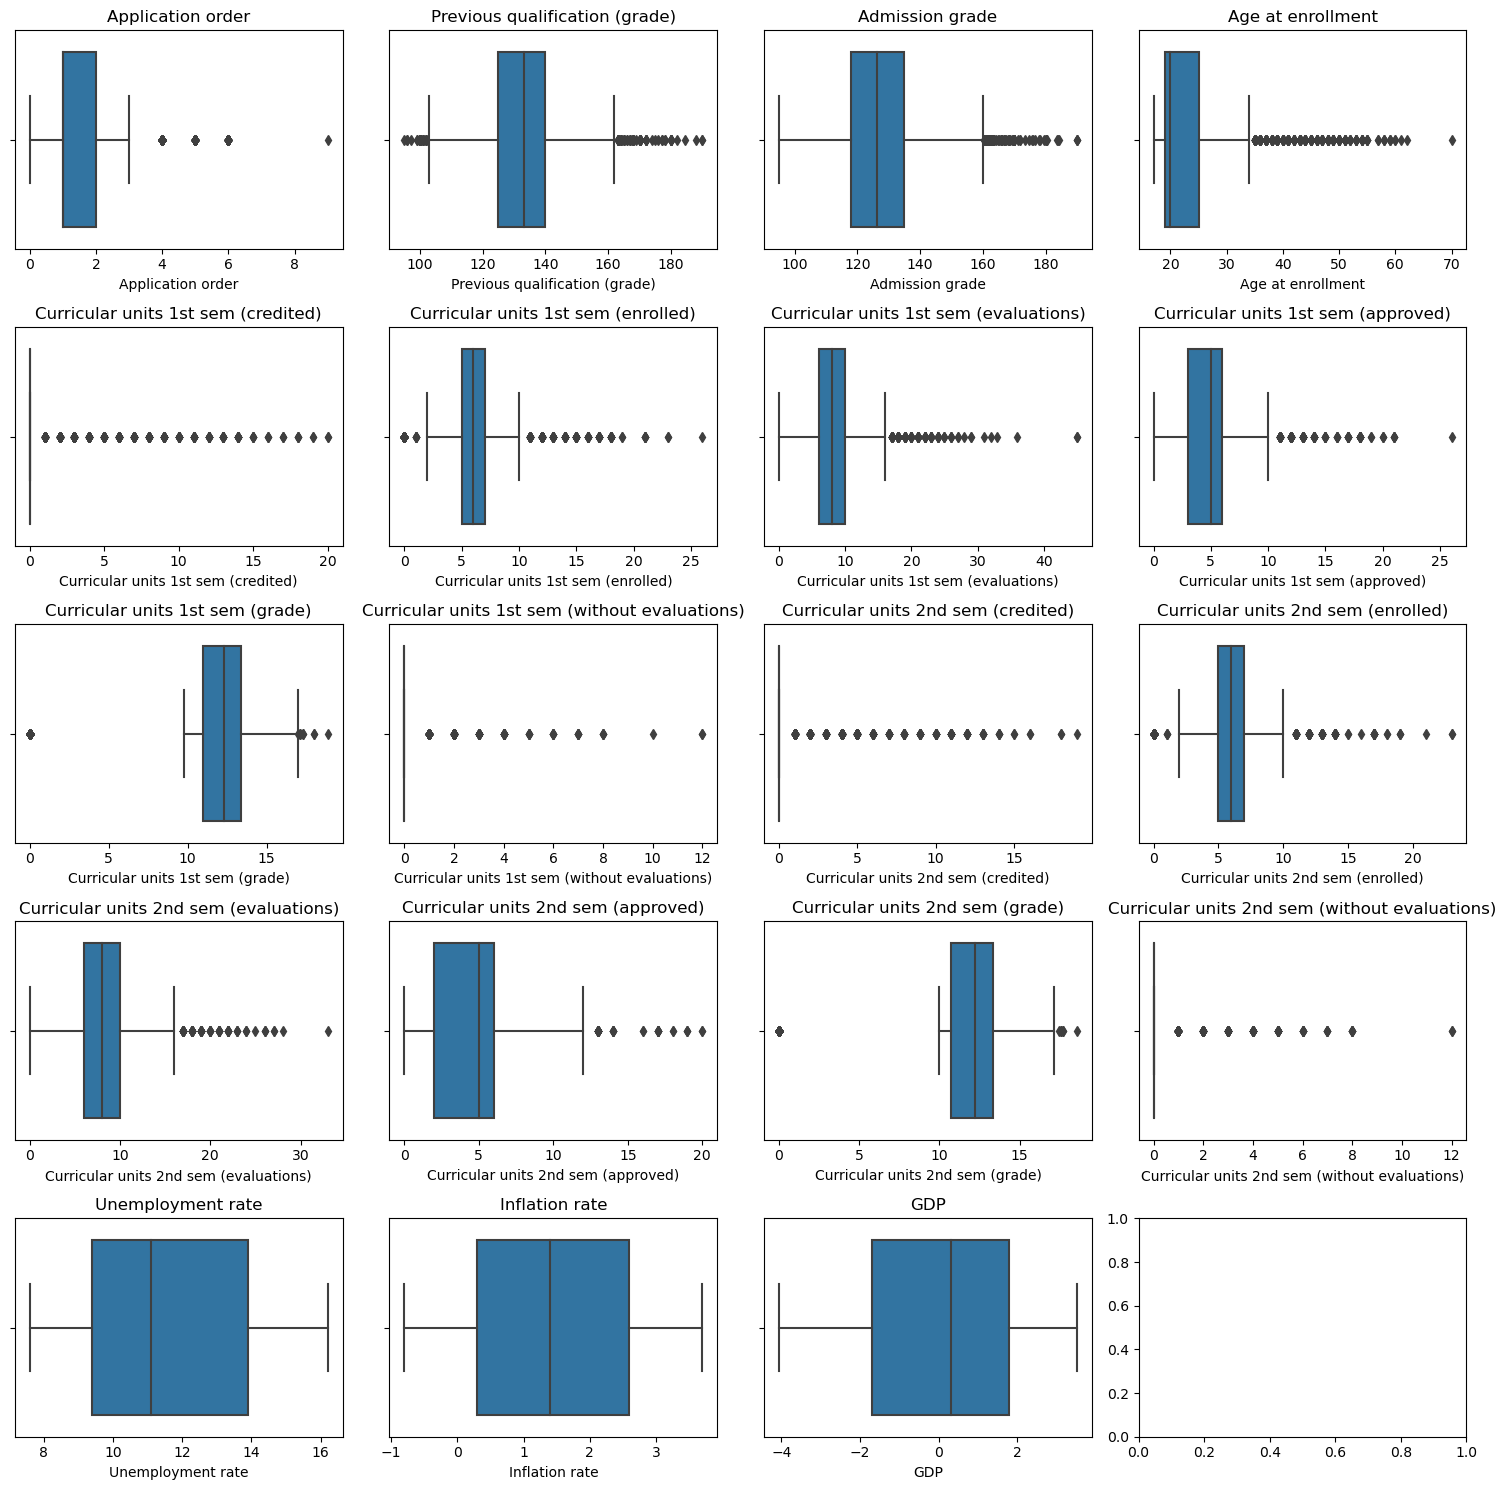

In [17]:
# Creating boxplots to show outliers
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Iterate through each column and create a boxplot
for i, col in enumerate(num_cols.columns):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.boxplot(x=num_cols[col], ax=ax)
    ax.set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### from the above visualization, all columns contains a significant number of outliers aside from the Unemployment rate, Inflation rate, and GDP columns that are outliers-free

In [18]:
# Identifying outliers using IQR and checking for the number of outliers for each numerical columns
outliers_count = ((num_cols < num_cols.quantile(0.25) - 1.5 * (num_cols.quantile(0.75) - num_cols.quantile(0.25))) |
                  (num_cols > num_cols.quantile(0.75) + 1.5 * (num_cols.quantile(0.75) - num_cols.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

Application order                                 541
Previous qualification (grade)                    179
Admission grade                                    86
Age at enrollment                                 441
Curricular units 1st sem (credited)               577
Curricular units 1st sem (enrolled)               424
Curricular units 1st sem (evaluations)            158
Curricular units 1st sem (approved)               180
Curricular units 1st sem (grade)                  726
Curricular units 1st sem (without evaluations)    294
Curricular units 2nd sem (credited)               530
Curricular units 2nd sem (enrolled)               369
Curricular units 2nd sem (evaluations)            109
Curricular units 2nd sem (approved)                44
Curricular units 2nd sem (grade)                  877
Curricular units 2nd sem (without evaluations)    282
Unemployment rate                                   0
Inflation rate                                      0
GDP                         

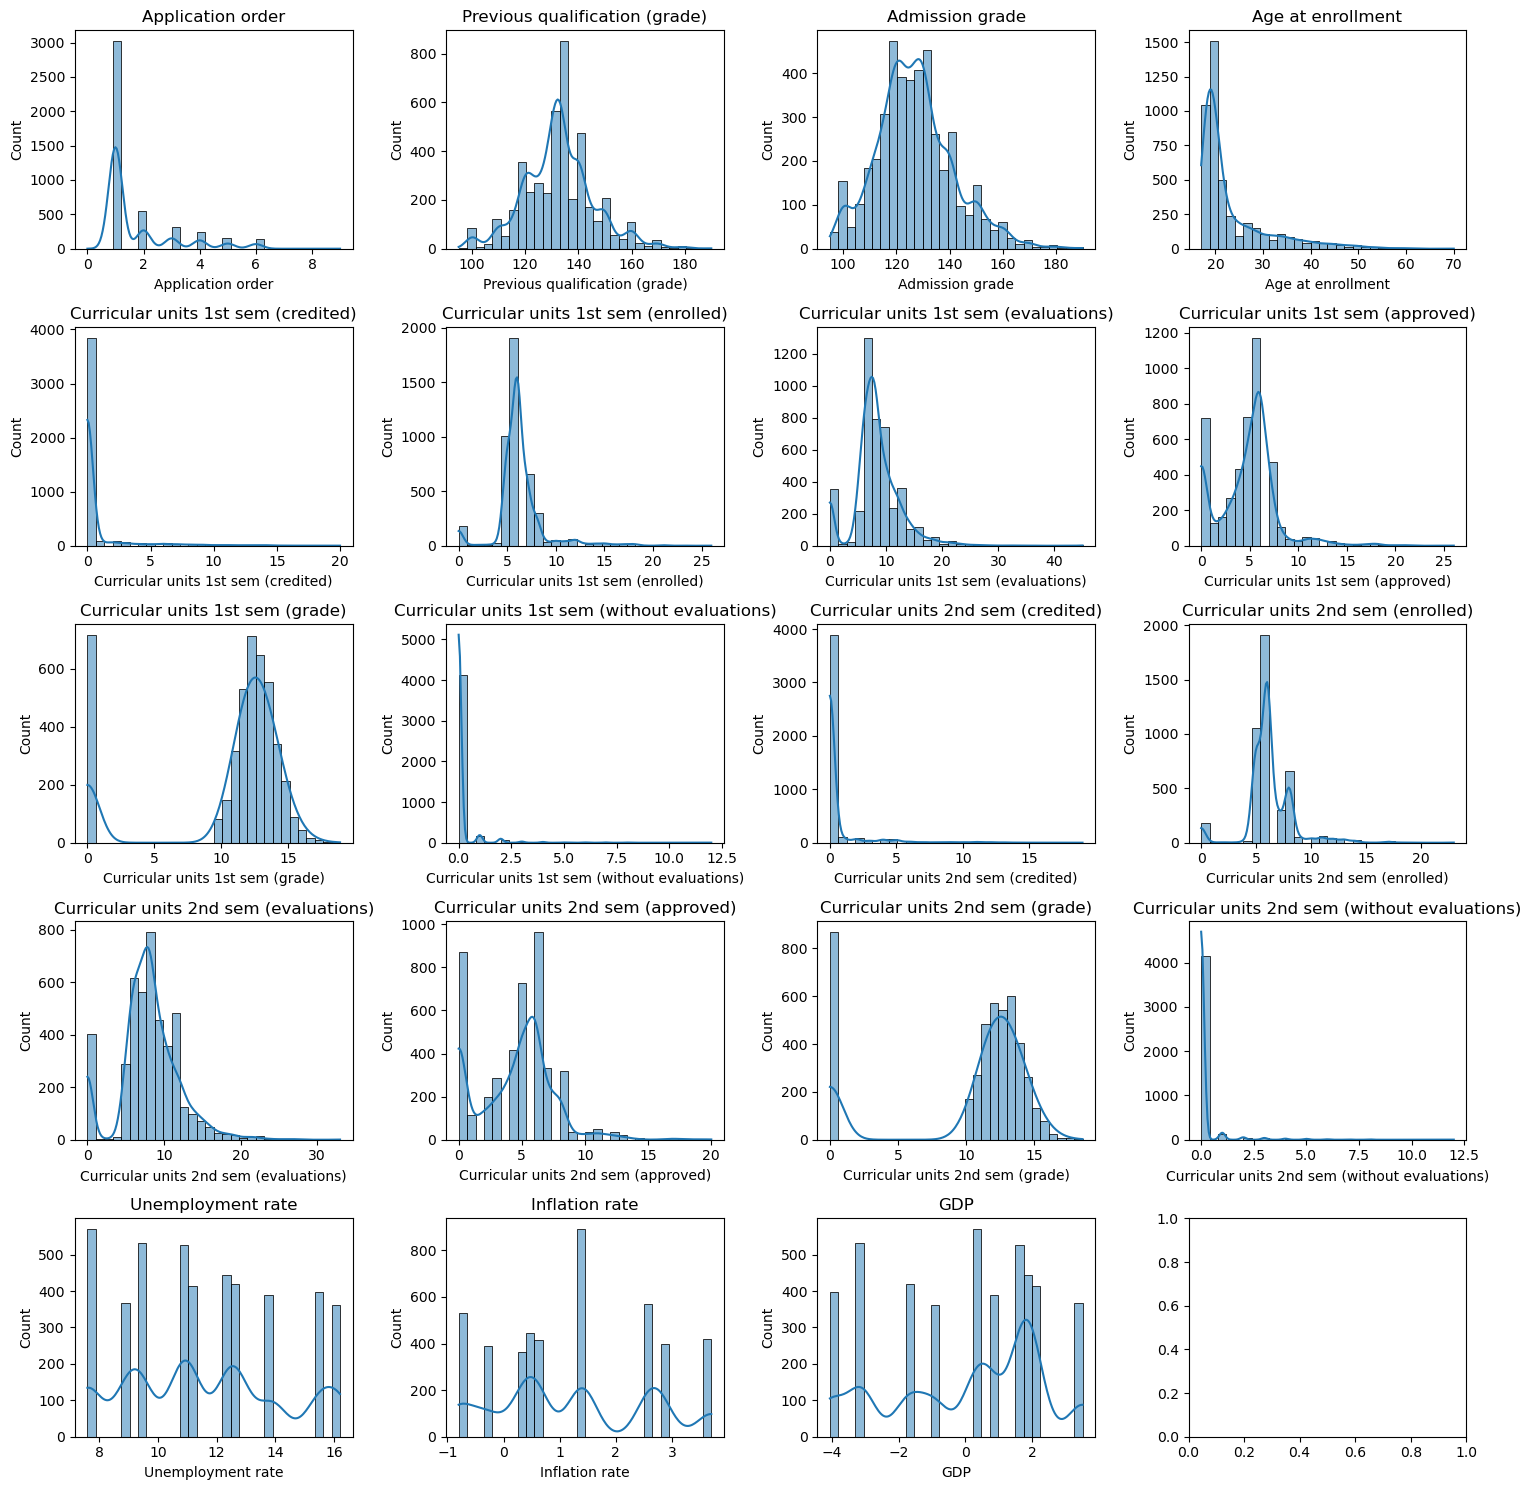

In [19]:
# Plotting a histogram to understand the skewness of the columns 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Iterate through each column and create a histogram
for i, col in enumerate(num_cols.columns):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.histplot(data=num_cols, x=col, ax=ax, kde=True, bins=30)
    ax.set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [20]:
# handling outliers using median

# Calculate the median of each numerical variable
medians = num_cols.median()

# Replace outliers with the median of each variable
for column in num_cols.columns:
    q1 = num_cols[column].quantile(0.25)
    q3 = num_cols[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr # Any value below the lower bound is outlier, above the upperbound-outlier too.
    upper_bound = q3 + 1.5 * iqr
    num_cols[column] = num_cols[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)


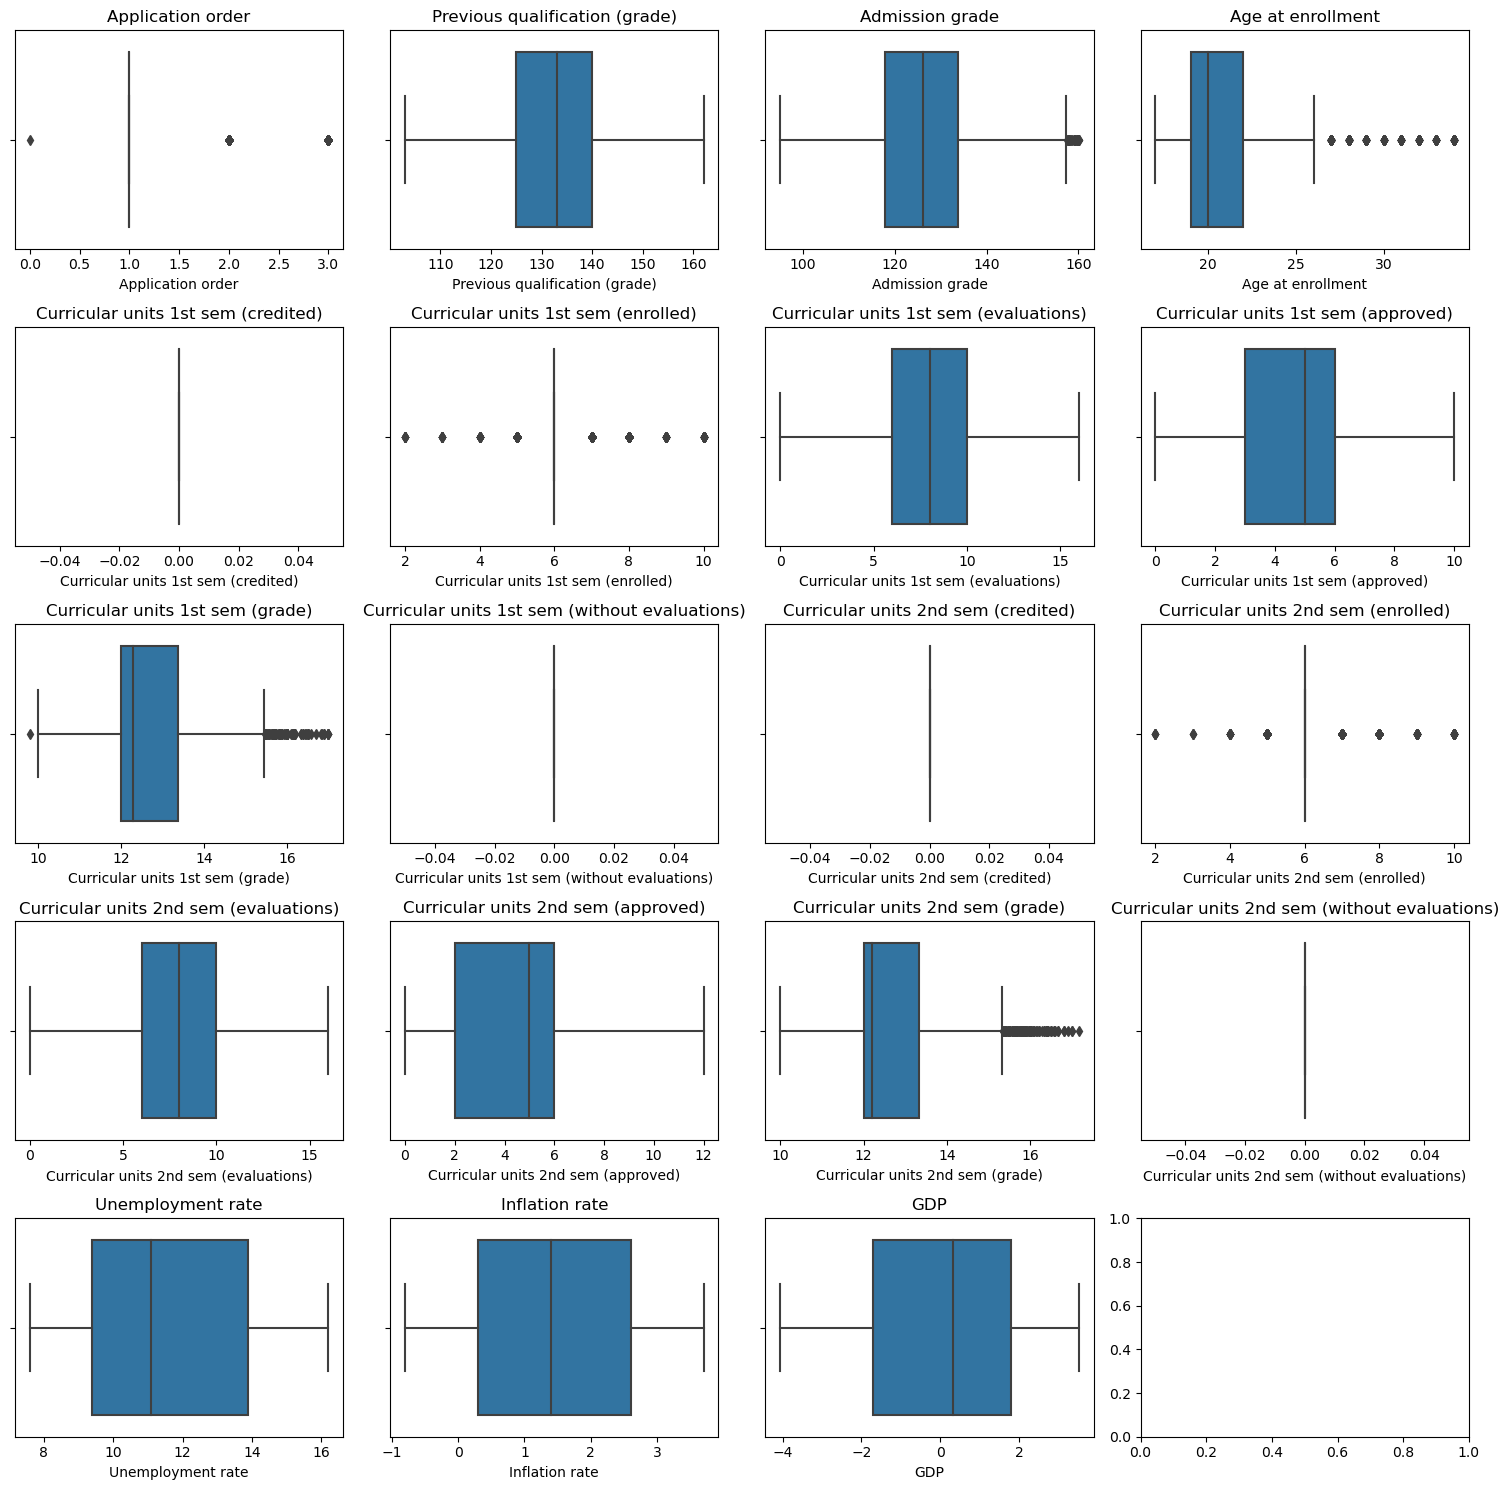

In [21]:
# Creating boxplots to show result after handling outliers
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Iterate through each column and create a boxplot
for i, col in enumerate(num_cols.columns):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.boxplot(x=num_cols[col], ax=ax)
    ax.set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### From this visualization, though most of the outliers were handled when the IQR method was applied, we still have some outliers in some columns

In [36]:
# Winsorizing the remaining outliers to capp them and reduce their impacts
# ignoring warnings from codes

# Ignoring warnings

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress specific warnings (replace 'UserWarning' with the warning type)
warnings.filterwarnings('ignore', category=UserWarning)

from scipy.stats import mstats

# List of numerical columns
numerical_columns = ['Application order', 'Previous qualification (grade)', 'Admission grade', 
                     'Age at enrollment', 'Curricular units 1st sem (credited)', 
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                     'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
                     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                     'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 
                     'Inflation rate', 'GDP']

# Function to apply Winsorizing
def winsorize_columns(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    """
    Apply Winsorizing to specific columns in the DataFrame.
    
    Parameters:
    - df: The pandas DataFrame
    - cols: List of column names to winsorize
    - lower_quantile: Lower percentile threshold (default is 1%)
    - upper_quantile: Upper percentile threshold (default is 99%)
    """
    for col in cols:
        df[col] = mstats.winsorize(df[col], limits=[lower_quantile, 1 - upper_quantile])

# Apply Winsorizing to the num_cols DataFrame
winsorize_columns(num_cols, numerical_columns)

# Check the result after winsorizing
num_cols.describe()


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.0,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.000000,4424.000000,4424.000000
mean,1.263336,132.597536,126.171022,21.062613,0.0,6.116184,7.850814,4.354430,12.621496,0.0,0.0,6.200949,7.773508,4.329114,12.617181,0.0,11.566139,1.228029,0.001969
std,0.577718,10.970809,13.132899,3.824539,0.0,0.949348,3.346976,2.430971,1.212549,0.0,0.0,1.070260,3.452696,2.795899,1.227006,0.0,2.663850,1.382711,2.269935
min,1.000000,110.000000,99.000000,18.000000,0.0,5.000000,0.000000,0.000000,10.000000,0.0,0.0,5.000000,0.000000,0.000000,10.000000,0.0,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.0,6.000000,6.000000,3.000000,12.000000,0.0,0.0,6.000000,6.000000,2.000000,12.000000,0.0,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.0,6.000000,8.000000,5.000000,12.285714,0.0,0.0,6.000000,8.000000,5.000000,12.200000,0.0,11.100000,1.400000,0.320000
75%,1.000000,140.000000,133.725000,22.000000,0.0,6.000000,10.000000,6.000000,13.386161,0.0,0.0,6.000000,10.000000,6.000000,13.333333,0.0,13.900000,2.600000,1.790000
max,3.000000,160.000000,160.000000,34.000000,0.0,10.000000,16.000000,9.000000,16.000000,0.0,0.0,10.000000,16.000000,11.000000,16.000000,0.0,16.200000,3.700000,3.510000


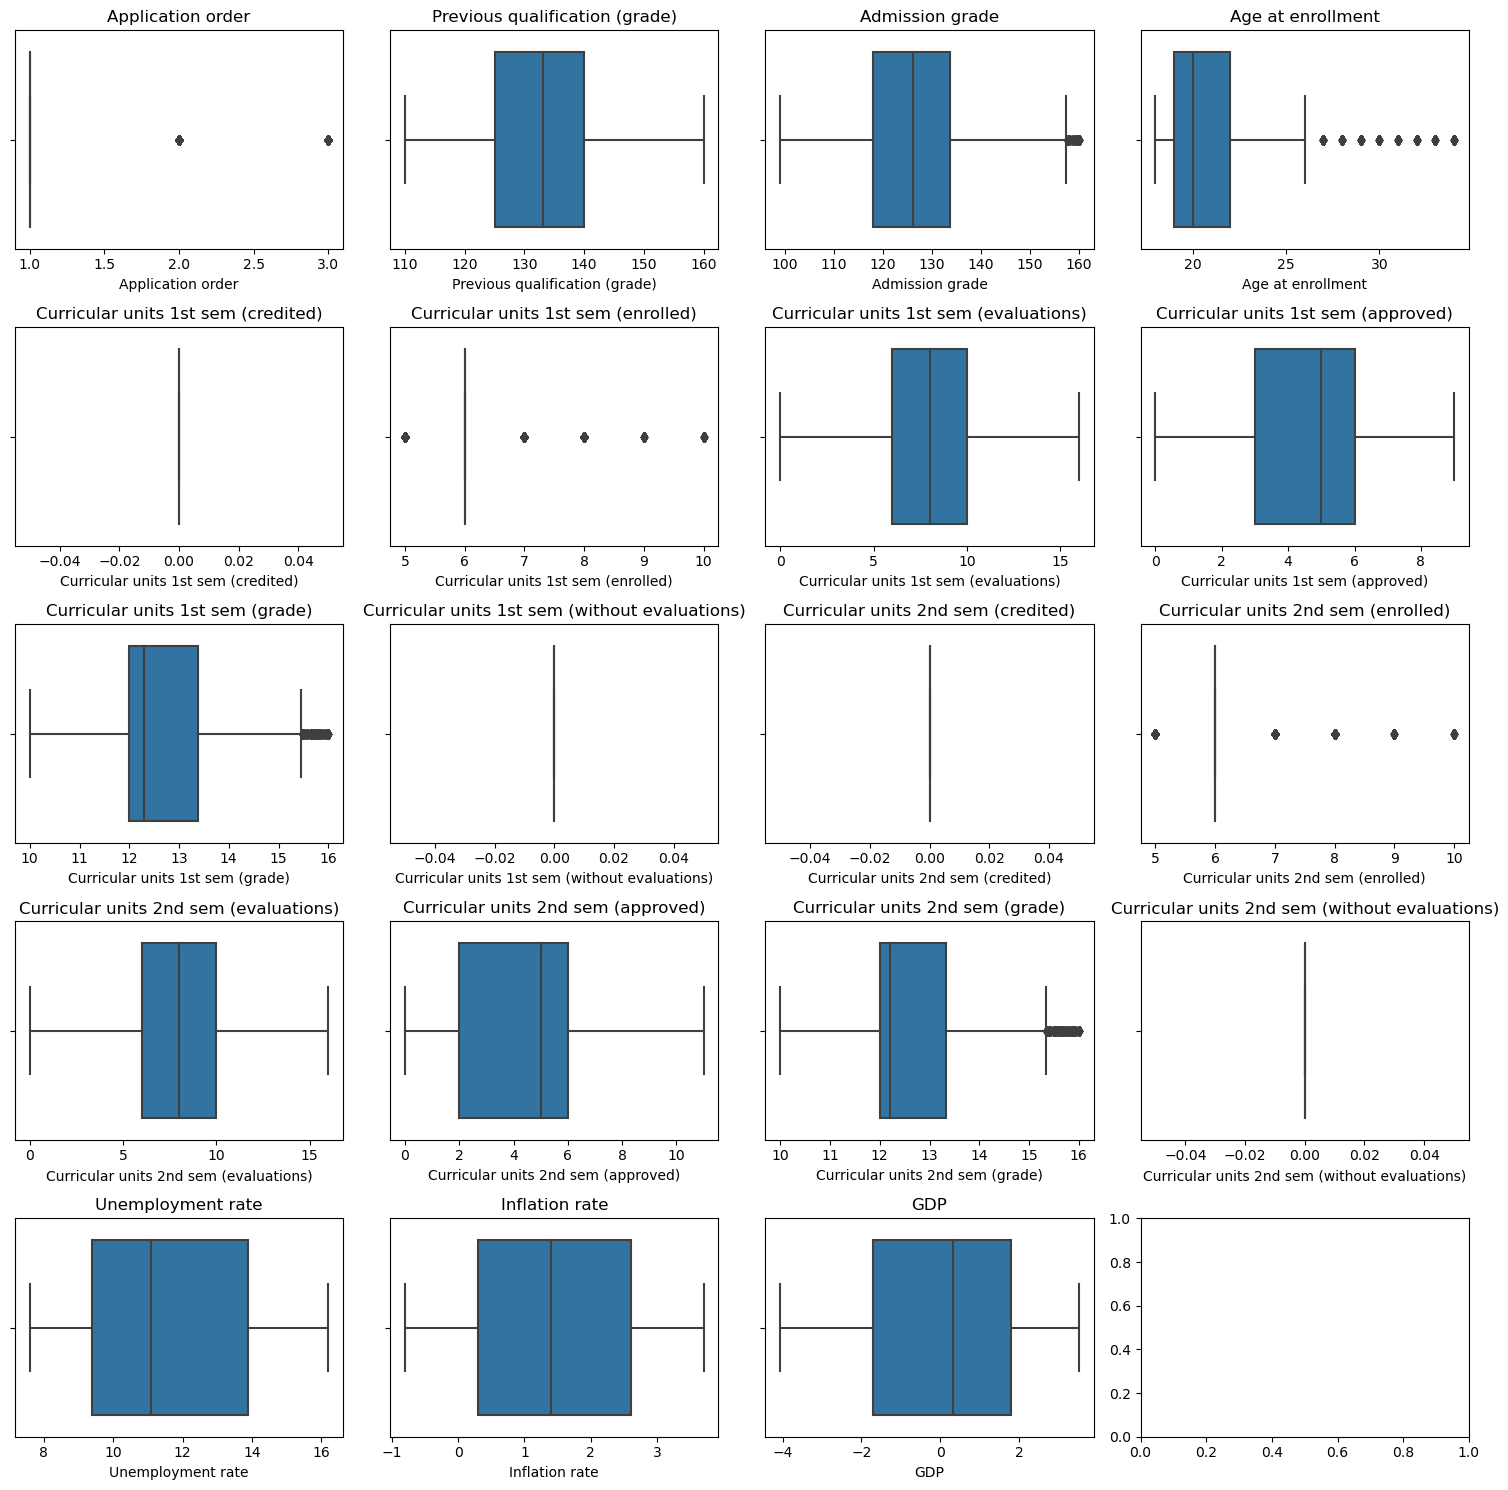

In [23]:
# Creating boxplots to show result after handling outliers
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Iterate through each column and create a boxplot
for i, col in enumerate(num_cols.columns):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.boxplot(x=num_cols[col], ax=ax)
    ax.set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [24]:
# Data validation for the target to determine if we have a balanced dataset
target_counts = cat_cols['Target'].value_counts()

target_counts

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

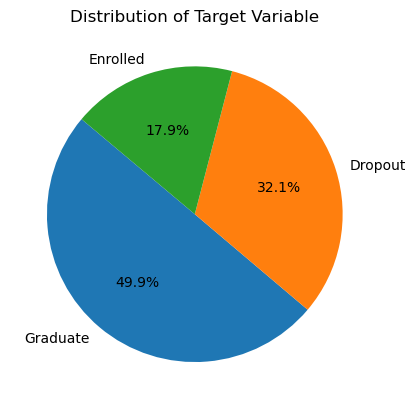

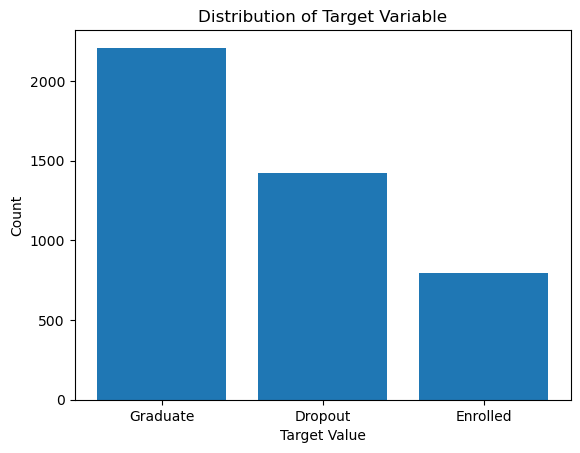

In [25]:
# visualizing the value count for the target

# Create the pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Target Variable')

# Show the plot
plt.show()


# Create the bar plot
plt.bar(target_counts.index, target_counts)

# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Show the plot
plt.show()

In [26]:
# Encoding categorical columns. Other categorical columns is already encoded, except the target column

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Target' column
cat_cols['Target'] = label_encoder.fit_transform(cat_cols['Target'])

# Display the updated dataframe
cat_cols['Target']



0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int32

In [27]:
# Graduate = 2209, Dropout = 1421, Enrolled = 794

cat_cols['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [28]:
# Normalizing numerical columns using minmaxscaler

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns
num_cols_normalized = scaler.fit_transform(num_cols)

# Convert back to DataFrame (optional, for easy readability)
num_cols_normalized_df = pd.DataFrame(num_cols_normalized, columns=num_cols.columns)

# Display the normalized DataFrame
print(num_cols_normalized_df)

      Application order  Previous qualification (grade)  Admission grade  \
0                   0.0                           0.240         0.463934   
1                   0.0                           1.000         0.713115   
2                   0.0                           0.240         0.422951   
3                   0.5                           0.240         0.337705   
4                   0.0                           0.462         0.696721   
...                 ...                             ...              ...   
4419                0.0                           0.300         0.380328   
4420                0.5                           0.200         0.327869   
4421                0.0                           0.880         0.827869   
4422                0.0                           0.462         0.898361   
4423                0.0                           0.840         0.868852   

      Age at enrollment  Curricular units 1st sem (credited)  \
0                0.1250

In [29]:
# concatenating numerical and categorical columns
df1 = pd.concat([num_cols, cat_cols], axis = 1)
df1.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1.0,122.0,127.3,20.0,0.0,6.0,0.0,0.0,12.285714,0.0,...,5,9,1,0,0,1,1,0,0,0
1,1.0,160.0,142.5,19.0,0.0,6.0,6.0,6.0,14.000000,0.0,...,3,3,1,0,0,0,1,0,0,2
2,1.0,122.0,124.8,19.0,0.0,6.0,0.0,0.0,12.285714,0.0,...,9,9,1,0,0,0,1,0,0,0
3,2.0,122.0,119.6,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,...,5,3,1,0,0,1,0,0,0,2
4,1.0,133.1,141.5,20.0,0.0,6.0,9.0,5.0,12.333333,0.0,...,9,9,0,0,0,1,0,0,0,2


# Performing descriptive statistics on all coloumns


In [30]:
# ignoring warnings from codes

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress specific warnings (replace 'UserWarning' with the warning type)
warnings.filterwarnings('ignore', category=UserWarning)

In [31]:
# Descriptive statistics for all variables
descriptive_stats = num_cols.describe(include='all')

# Display descriptive statistics in a tabular form
descriptive_stats.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.0,4424.000000,4424.000000,4424.000000,4424.000000,4424.0,4424.000000,4424.000000,4424.000000
mean,1.263336,132.597536,126.171022,21.062613,0.0,6.116184,7.850814,4.354430,12.621496,0.0,0.0,6.200949,7.773508,4.329114,12.617181,0.0,11.566139,1.228029,0.001969
std,0.577718,10.970809,13.132899,3.824539,0.0,0.949348,3.346976,2.430971,1.212549,0.0,0.0,1.070260,3.452696,2.795899,1.227006,0.0,2.663850,1.382711,2.269935
min,1.000000,110.000000,99.000000,18.000000,0.0,5.000000,0.000000,0.000000,10.000000,0.0,0.0,5.000000,0.000000,0.000000,10.000000,0.0,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.0,6.000000,6.000000,3.000000,12.000000,0.0,0.0,6.000000,6.000000,2.000000,12.000000,0.0,9.400000,0.300000,-1.700000


In [32]:
### carrying out correlation analysis

cat_cols['Target'].value_counts()


Target
2    2209
0    1421
1     794
Name: count, dtype: int64

# Performing Hypotheses

#### Performing Independence test with Chi square to know the correlation of the cat variables with the label

* Chi-Square Independence Test for Categorical Variables


* The Chi-Square independence test will be implemented to check the association between the categorical variables and the dependent variable, with the hypothesis as follows:


* H0: the two variables are independent (***Null Hypothesis***)
* H1: the two variables are dependent   (***Alternate Hypothesis***)


* α = 0.05


* I will reject the null hypothesis and accept the alternative hypothesis if the p-value is less than 0.05, meaning the two variables are dependent. If the p-value is greater than or equal to 0.05, I fail to reject the null hypothesis, meaning the two variables are independent.

**I will reject the null hypothesis and reject the alternate hypothesis. A p-value less than 0.5 is an alternate hypothesis which means the the variables are dependent of each other. The p-value from 0.5 and above is a null hypothesis meaning the variables are independent of each other**

In [33]:
from scipy.stats import chi2_contingency

# list of categorical features


cats = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nationality', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International']

# Get the p-values from Chi-Square indenpendence tests
p_value = []

for col in cats:
    crosstable = pd.crosstab(index = df1[col], 
                             columns = df1['Target'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital status,0.00000
14,Gender,0.00000
13,Tuition fees up to date,0.00000
12,Debtor,0.00000
10,Displaced,0.00000
9,Father's occupation,0.00000
15,Scholarship holder,0.00000
8,Mother's occupation,0.00000
6,Mother's qualification,0.00000
4,Previous qualification,0.00000


***According to the Hypotheses, only Nationality, International, and Education special needs are null hypotheses (Independent of the Target variables which are; Graduate, Dropout, and Enrolled). I will drop these features from the dataframe when building my model***

### Checking the Correlation Between the Numerical Columns and the Label Using Spearman Ranking

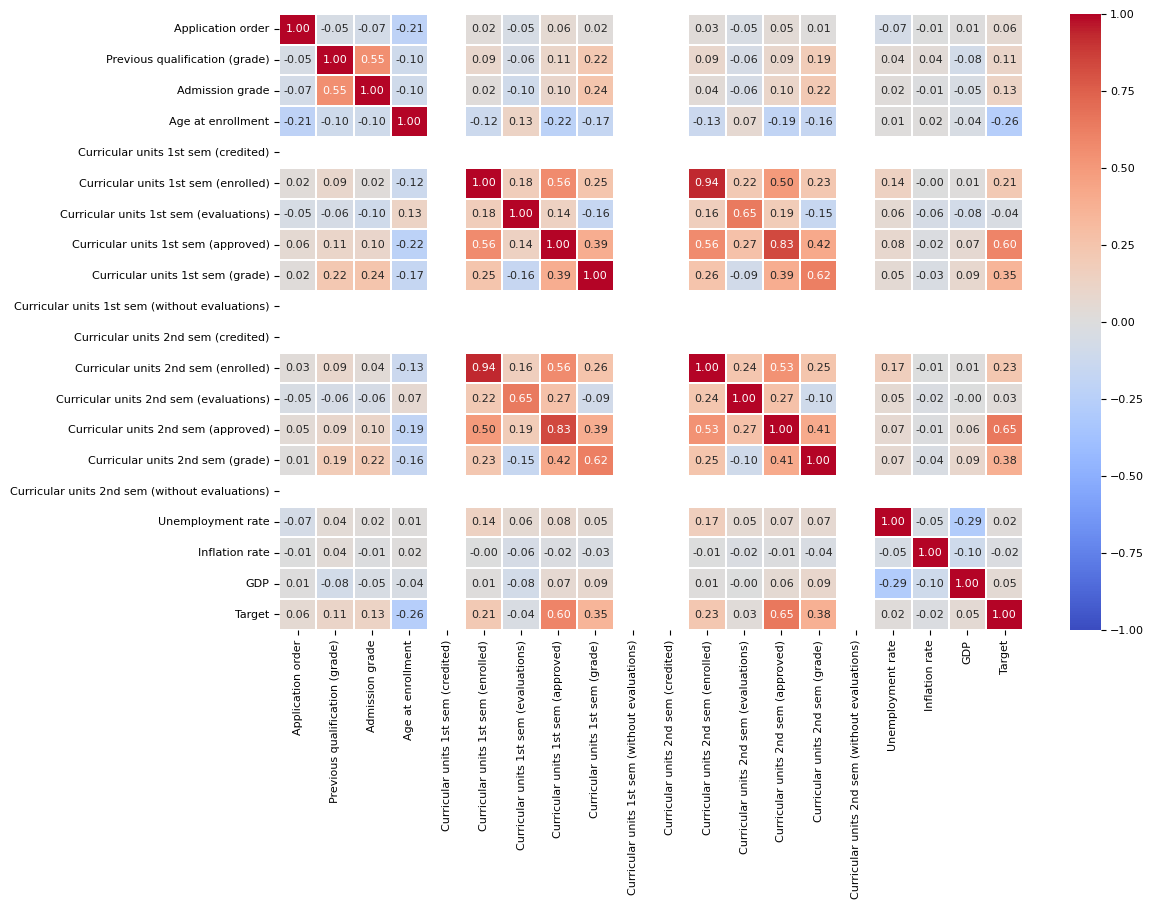

In [34]:
# Numerical columns
num_columns = ['Application order', 'Previous qualification (grade)', 'Admission grade', 
                     'Age at enrollment', 'Curricular units 1st sem (credited)', 
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                     'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
                     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                     'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 
                     'Inflation rate', 'GDP', 'Target']

# Create a new DataFrame with only the numeric features
num_df = df1[num_columns]

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_df.corr(method='spearman'),
                 cmap='coolwarm', annot=True, fmt='.2f',
                 linewidths=0.2, vmin=-1, vmax=1, center=0)